# **Exercício Computacional 3 - PSI3471**

Cezar Gabriel Moreno Almeida Lima - 11806980 </br>
Lucas Harada - 11449492

### <h1> <b> Erros quadráticos médios obtido no dataset de teste: </b> </h1> 

In [ ]:
| Neurônios  |  MSEfa   |
+------------+----------+
|     3      |0.00001083|
|     4      |0.00000704|
|     5      |0.00000472|
|     10     |0.00000256|
|     15     |0.00000259|
|     20     |0.00000226|
|     50     |0.00000270|
|    100     |0.00000107|
+------------+----------+
#
| Neurônios  |  MSEfb   |
+------------+----------+
|     3      |0.02882490|
|     4      |0.02702024|
|     5      |0.00020915|
|     10     |0.00000022|
|     15     |0.00000232|
|     20     |0.00000362|
|     50     |0.00000068|
|    100     |0.00000043|
+------------+----------+
#
| Neurônios  |  MSEfc   |
+------------+----------+
|     3      |0.00000032|
|     4      |0.00000034|
|     5      |0.00000010|
|     10     |0.00000013|
|     15     |0.00000030|
|     20     |0.00000024|
|     50     |0.00000029|
|    100     |0.00812181|
+------------+----------+
#
| Neurônios  |  MSEfd   |
+------------+----------+
|     3      |0.00026223|
|     4      |0.00005936|
|     5      |0.00004012|
|     10     |0.00001300|
|     15     |0.00001541|
|     20     |0.00001106|
|     50     |0.00047895|
|    100     |0.89664622|
+------------+----------+

# Gerando o dataset de treino

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$a. fa(x) = \frac{1}{x}, \ 1\leq x \leq 100 $$ 
$$b. fb(x) = \log_{10}{x}, \ 1\leq x \leq 10 $$
$$c. fc(x) = e^{-x}, \ 1\leq x \leq 10 $$
$$d. fd(x) = sen{x}, \ 1\leq x \leq \frac{\pi}{2} $$

In [ ]:
fa = lambda x: 1/x
fb = lambda x: np.log10(x)
fc = lambda x: np.exp(-x)
fd = lambda x: np.sin(x)

Para se gerar pontos onde as funções serão treinadas, serão gerados pontos aleatórios entre os intervalos desejados.

In [ ]:
quantidadeDePontosTreino = 5000

In [ ]:
# Obtendo os valores de X para a função fa

#points_of_x_100 = np.linspace(1, 100, 10)
xmin, xmax, qtd = 1, 100, quantidadeDePontosTreino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp() 
points_of_x_100 = (xmax - xmin) * x + xmin #points_of_x_100 é um vetor crescente com números aleatórios entre 1 e 100

In [ ]:
# Obtendo os valores de X para as funções fb e fc

#points_of_x_10 = np.linspace(1, 10, 10)
xmin, xmax, qtd = 1, 10, quantidadeDePontosTreino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp() 
points_of_x_10 = (xmax - xmin) * x + xmin #points_of_x_10 é um vetor crescente com números aleatórios entre 1 e 10

In [ ]:
# Obtendo os valores de X para a função fd

#points_of_x_pi_2 = np.linspace(1, np.pi/2, 1000)
xmin, xmax, qtd = 1, np.pi/2, quantidadeDePontosTreino
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()
points_of_x_pi_2 = (xmax - xmin) * x + xmin #points_of_x_pi_2 é um vetor crescente com números aleatórios entre 1 e pi/2

In [ ]:
fa_data_train = np.array([points_of_x_100, fa(points_of_x_100)]).T
fb_data_train = np.array([points_of_x_10, fb(points_of_x_10)]).T
fc_data_train = np.array([points_of_x_10, fc(points_of_x_10)]).T
fd_data_train = np.array([points_of_x_pi_2, fd(points_of_x_pi_2)]).T

# Observando os gráficos


Text(0.5, 0, 'x')

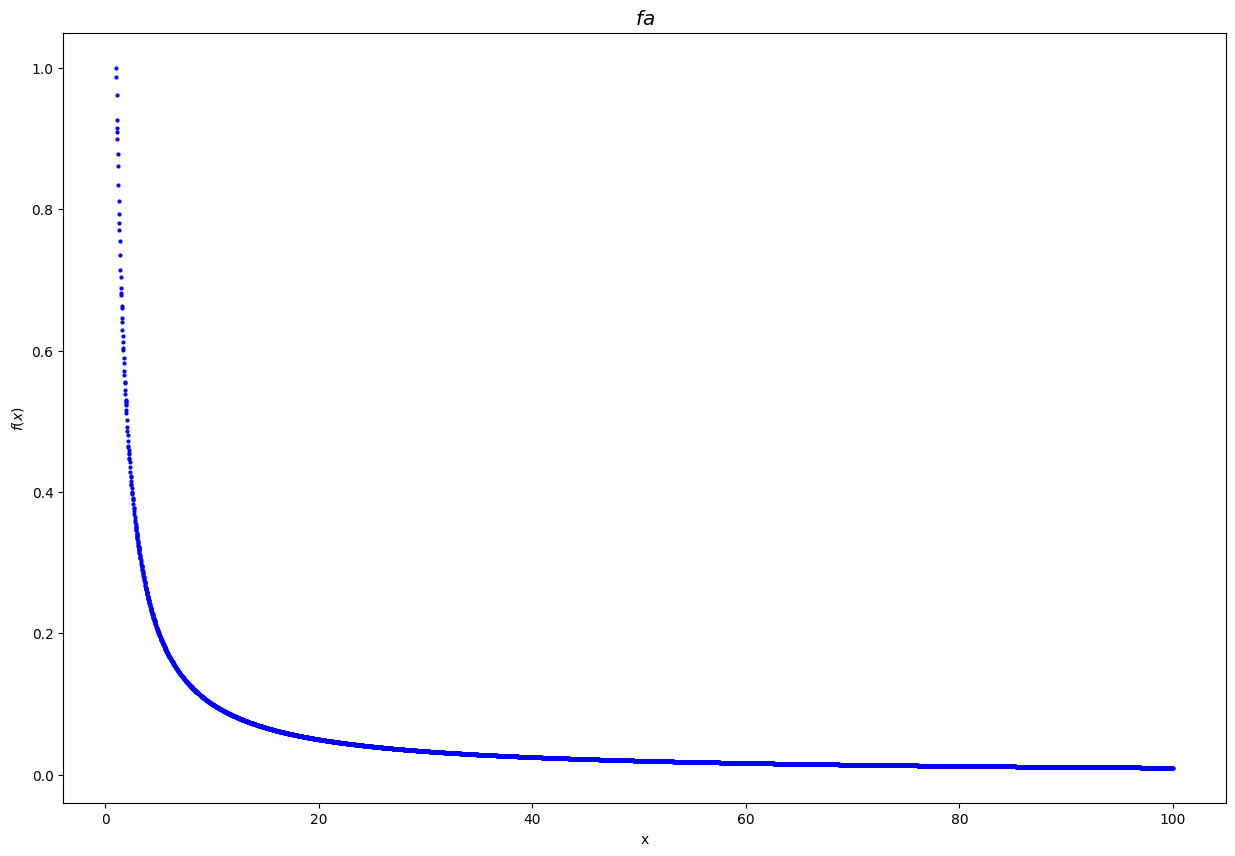

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(fa_data_train[:, 0], fa_data_train[:, 1], 'bo', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"$fa $")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")


Text(0.5, 0, 'x')

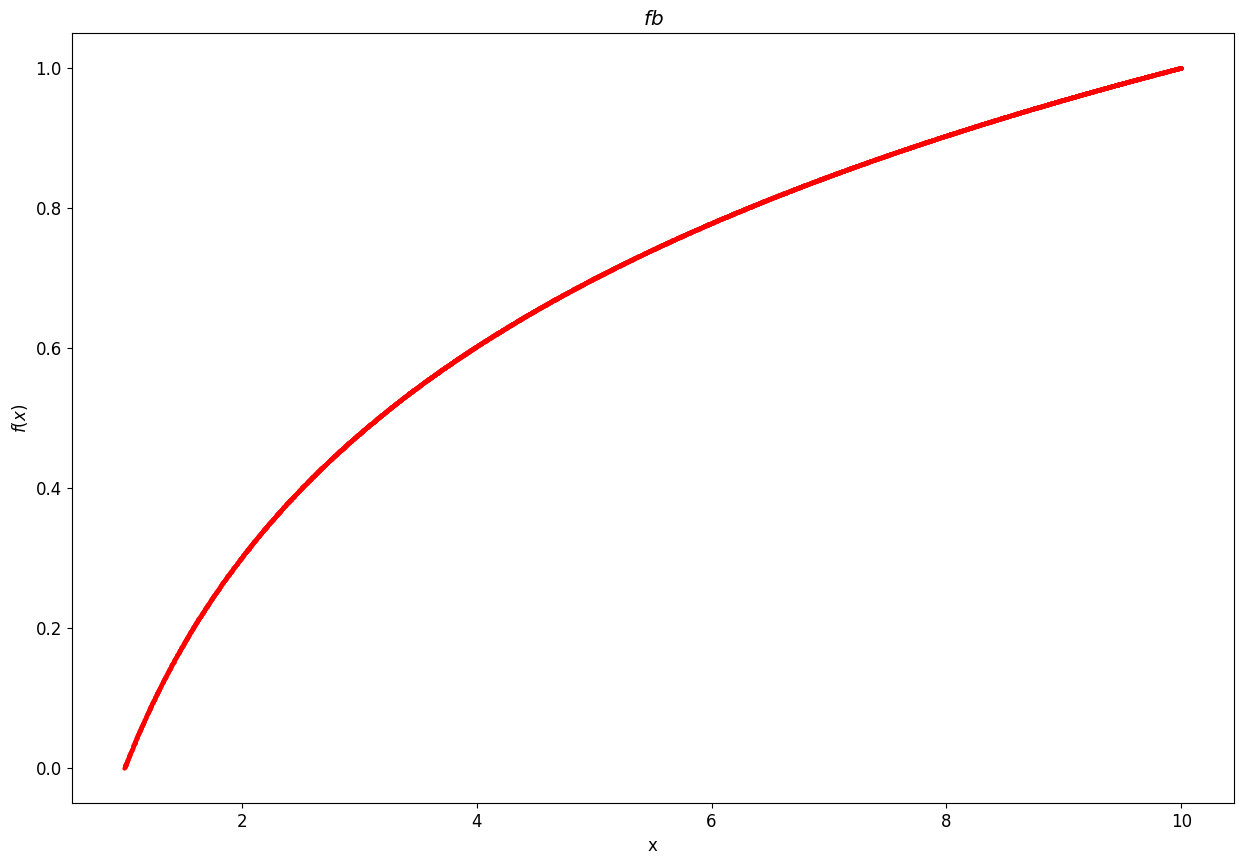

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(fb_data_train[:, 0], fb_data_train[:, 1], 'ro', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"$fb $")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

Text(0.5, 0, 'x')

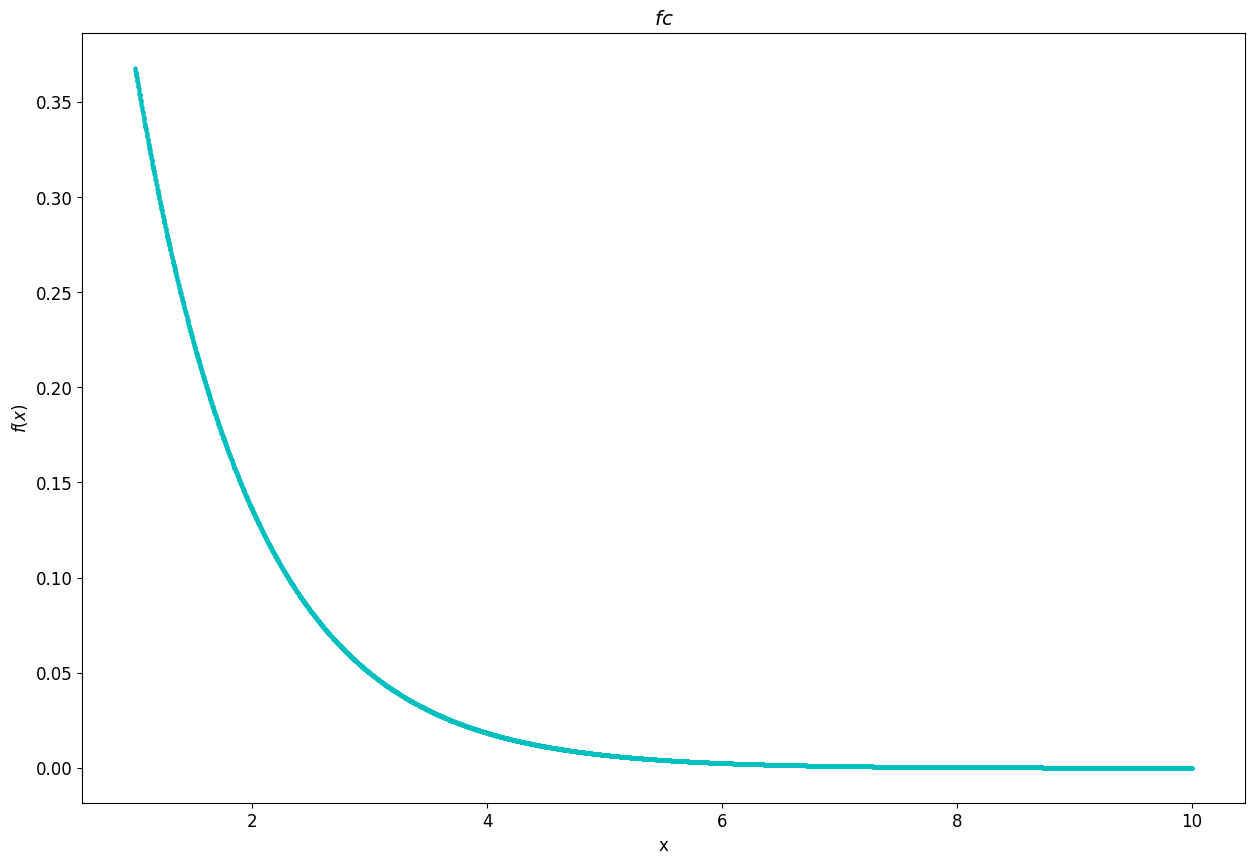

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(fc_data_train[:, 0], fc_data_train[:, 1], 'co', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"$fc $")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

Text(0.5, 0, 'x')

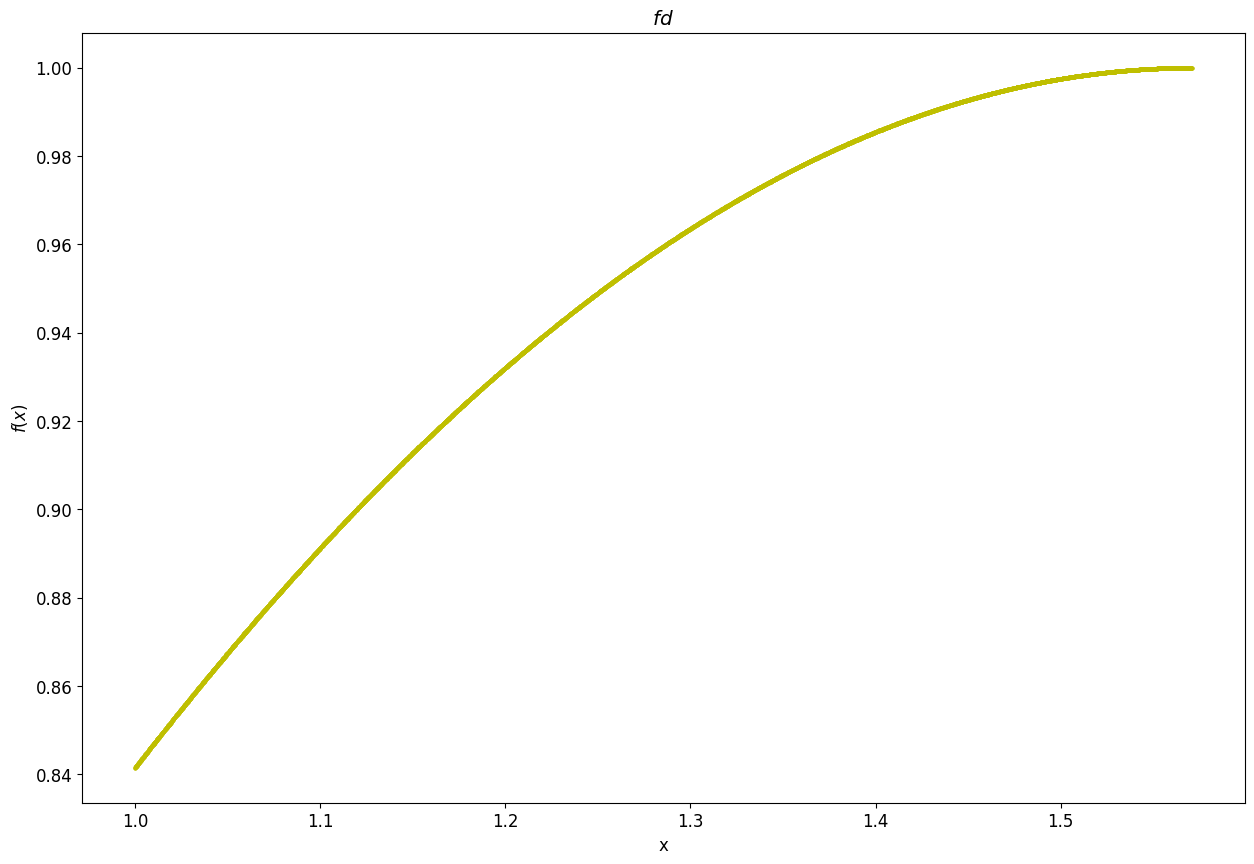

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(fd_data_train[:, 0], fd_data_train[:, 1], 'yo', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"$fd $")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

# Treinamento da rede MLP 

In [ ]:
import numpy as np

def sigmoide(x):
    return 1/(1+np.exp(-x))

def redeMLP(x, W1, W2):
    # Camada oculta
    z = sigmoide(x @ W1)
    # Camada de saída
    y = z @ W2
    return y, z

def Treinamento(x, d, eta, Nepocas, Nneuronios):
    # Inicialização dos pesos
    Nx = x.shape[1]
    n_ocultos = Nneuronios
    n_saidas = d.shape[1]
    W1 = 0.02 * np.random.rand(Nx, n_ocultos + 1) - 0.01
    W2 = 0.02 * np.random.rand(n_ocultos + 1, n_saidas) - 0.01

    # Parâmetros do treinamento
    J_MSE = []
    N = x.shape[0]
    Nb = 50 # Tamanho do mini-batch
    for epoca in range(Nepocas):
        indices = np.arange(N)
        np.random.shuffle(indices)
        x = x[indices]
        d = d[indices]

        for k in range(0, N, Nb):
            xk = x[k:k+Nb]
            dk = d[k:k+Nb]

            # Forward pass
            y, z = redeMLP(xk, W1, W2)

            # Backward pass
            delta_saida = y - dk
            delta_oculta = z * (1 - z) * np.dot(delta_saida, W2.T)

            # Atualização dos pesos
            dW2 = z.T @ delta_saida
            dW1 = (np.concatenate((xk, np.ones((xk.shape[0], 1))), axis=1).T @ delta_oculta)
            W2 = W2 - eta * dW2 / Nb
            W1 = W1 - eta * dW1[:-1, :] / Nb

        # Cálculo do erro médio quadrático
        y, _ = redeMLP(x, W1, W2)
        J_MSE.append(np.mean((d - y)**2))
        
        if epoca % 1000 == 0: # PRINT DA ÉPOCA
          print(f"Época: {epoca}, MSE: {J_MSE[epoca]}")

    return W1, W2, J_MSE


## Treino das redes de $fa = 1/x$

In [ ]:
x = np.array([fa_data_train[:, 0]]).T
d = np.array([fa_data_train[:, 1]]).T

In [ ]:
#números de neurônios na camada oculta: 3, 4, 5, 10, 15, 20, 50, 100

In [ ]:
print("Treinando a rede de " + str(3) + " neurônios.")
Wcamadaoculta3fa, Wcamadasaida3fa, J_MSE3fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 3)
print("Treinando a rede de " + str(4) + " neurônios.")
Wcamadaoculta4fa, Wcamadasaida4fa, J_MSE4fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 4)
print("Treinando a rede de " + str(5) + " neurônios.")
Wcamadaoculta5fa, Wcamadasaida5fa, J_MSE5fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 5)
print("Treinando a rede de " + str(10) + " neurônios.")
Wcamadaoculta10fa, Wcamadasaida10fa, J_MSE10fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 10)
print("Treinando a rede de " + str(15) + " neurônios.")
Wcamadaoculta15fa, Wcamadasaida15fa, J_MSE15fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 15)
print("Treinando a rede de " + str(20) + " neurônios.")
Wcamadaoculta20fa, Wcamadasaida20fa, J_MSE20fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 20)
print("Treinando a rede de " + str(50) + " neurônios.")
Wcamadaoculta50fa, Wcamadasaida50fa, J_MSE50fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 50)
print("Treinando a rede de " + str(100) + " neurônios.")
Wcamadaoculta100fa, Wcamadasaida100fa, J_MSE100fa = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 100)

Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.0024650060154635563
Época: 1000, MSE: 1.2262619209177016e-05
Época: 2000, MSE: 1.0780821648404905e-05
Época: 3000, MSE: 1.0563127564148259e-05
Época: 4000, MSE: 1.0347334823046714e-05
Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.002467611461097458
Época: 1000, MSE: 1.1980901691770224e-05
Época: 2000, MSE: 1.055532652677997e-05
Época: 3000, MSE: 9.942897410386714e-06
Época: 4000, MSE: 8.637538366216703e-06
Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.002455022490786076
Época: 1000, MSE: 9.237883560026686e-06
Época: 2000, MSE: 4.833376224978657e-06
Época: 3000, MSE: 2.3684935554550374e-06
Época: 4000, MSE: 1.751418980612393e-06
Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.002485456511895858
Época: 1000, MSE: 7.041850646373529e-06
Época: 2000, MSE: 3.392280837862753e-06
Época: 3000, MSE: 2.256830904360841e-06
Época: 4000, MSE: 1.6947313236510237e-06
Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.0029413380612209345
Époc

In [ ]:
# vetor que contém o número de neurônios em cada camada,
# mas na posição 0, contém o número de entradas da rede
#Nx = [1, 10]
# Inicialização dos pesos
#W0 = 0.02 * np.random.rand(np.max(Nx), np.max(Nx) + 1) - 0.01

## Treino das redes de $fb = log_{10}(x)$

In [ ]:
x = np.array([fb_data_train[:, 0]]).T
d = np.array([fb_data_train[:, 1]]).T

In [ ]:
print("Treinando a rede de " + str(3) + " neurônios.")
Wcamadaoculta3fb, Wcamadasaida3fb, J_MSE3fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 3)
print("Treinando a rede de " + str(4) + " neurônios.")
Wcamadaoculta4fb, Wcamadasaida4fb, J_MSE4fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 4)
print("Treinando a rede de " + str(5) + " neurônios.")
Wcamadaoculta5fb, Wcamadasaida5fb, J_MSE5fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 5)
print("Treinando a rede de " + str(10) + " neurônios.")
Wcamadaoculta10fb, Wcamadasaida10fb, J_MSE10fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 10)
print("Treinando a rede de " + str(15) + " neurônios.")
Wcamadaoculta15fb, Wcamadasaida15fb, J_MSE15fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 15)
print("Treinando a rede de " + str(20) + " neurônios.")
Wcamadaoculta20fb, Wcamadasaida20fb, J_MSE20fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 20)
print("Treinando a rede de " + str(50) + " neurônios.")
Wcamadaoculta50fb, Wcamadasaida50fb, J_MSE50fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 50)
print("Treinando a rede de " + str(100) + " neurônios.")
Wcamadaoculta100fb, Wcamadasaida100fb, J_MSE100fb = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 100)

Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.02751120120023721
Época: 1000, MSE: 0.027400997898164813
Época: 2000, MSE: 0.027411712554930773
Época: 3000, MSE: 0.026886206378269883
Época: 4000, MSE: 0.02720675164066093
Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.028023417992905957
Época: 1000, MSE: 0.02698247694923176
Época: 2000, MSE: 0.027052465424339554
Época: 3000, MSE: 0.03208648996074414
Época: 4000, MSE: 0.02898971153136681
Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.034213908742573074
Época: 1000, MSE: 0.00019312195059758137
Época: 2000, MSE: 0.0002001066721581382
Época: 3000, MSE: 0.0001864247649258572
Época: 4000, MSE: 0.00018801990849282905
Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.005752131193631248
Época: 1000, MSE: 1.0398343147345058e-06
Época: 2000, MSE: 6.364107336513479e-07
Época: 3000, MSE: 4.6299392191296877e-07
Época: 4000, MSE: 6.655845046406333e-07
Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.002316060355049873
Época: 1000, MSE: 1.50

## Treino das redes de $fc = e^{(-x)}$

In [ ]:
x = np.array([fc_data_train[:, 0]]).T
d = np.array([fc_data_train[:, 1]]).T

In [ ]:
print("Treinando a rede de " + str(3) + " neurônios.")
Wcamadaoculta3fc, Wcamadasaida3fc, J_MSE3fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 3)
print("Treinando a rede de " + str(4) + " neurônios.")
Wcamadaoculta4fc, Wcamadasaida4fc, J_MSE4fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 4)
print("Treinando a rede de " + str(5) + " neurônios.")
Wcamadaoculta5fc, Wcamadasaida5fc, J_MSE5fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 5)
print("Treinando a rede de " + str(10) + " neurônios.")
Wcamadaoculta10fc, Wcamadasaida10fc, J_MSE10fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 10)
print("Treinando a rede de " + str(15) + " neurônios.")
Wcamadaoculta15fc, Wcamadasaida15fc, J_MSE15fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 15)
print("Treinando a rede de " + str(20) + " neurônios.")
Wcamadaoculta20fc, Wcamadasaida20fc, J_MSE20fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 20)
print("Treinando a rede de " + str(50) + " neurônios.")
Wcamadaoculta50fc, Wcamadasaida50fc, J_MSE50fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 50)
print("Treinando a rede de " + str(100) + " neurônios.")
Wcamadaoculta100fc, Wcamadasaida100fc, J_MSE100fc = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 100)

Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.00573523595861825
Época: 1000, MSE: 6.558864564150268e-07
Época: 2000, MSE: 2.612151896665798e-07
Época: 3000, MSE: 1.1751310032556204e-07
Época: 4000, MSE: 7.837133275531594e-08
Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.005652452797738568
Época: 1000, MSE: 2.08533834141623e-07
Época: 2000, MSE: 1.4536147523261825e-07
Época: 3000, MSE: 1.3439305290397408e-07
Época: 4000, MSE: 1.2966024525544957e-07
Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.005769088389180638
Época: 1000, MSE: 5.06593602699252e-07
Época: 2000, MSE: 4.609334649124998e-07
Época: 3000, MSE: 4.294578196116606e-07
Época: 4000, MSE: 4.091100846188989e-07
Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.005828847217435655
Época: 1000, MSE: 2.1757468691226016e-07
Época: 2000, MSE: 2.066419057382675e-07
Época: 3000, MSE: 1.990838872705698e-07
Época: 4000, MSE: 1.83264118133133e-07
Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.005822620578709679
Época: 1000,

## Treino das redes de $fd = sen(x)$

In [ ]:
x = np.array([fd_data_train[:, 0]]).T
d = np.array([fd_data_train[:, 1]]).T

In [ ]:
print("Treinando a rede de " + str(3) + " neurônios.")
Wcamadaoculta3fd, Wcamadasaida3fd, J_MSE3fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 3)
print("Treinando a rede de " + str(4) + " neurônios.")
Wcamadaoculta4fd, Wcamadasaida4fd, J_MSE4fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 4)
print("Treinando a rede de " + str(5) + " neurônios.")
Wcamadaoculta5fd, Wcamadasaida5fd, J_MSE5fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 5)
print("Treinando a rede de " + str(10) + " neurônios.")
Wcamadaoculta10fd, Wcamadasaida10fd, J_MSE10fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 10)
print("Treinando a rede de " + str(15) + " neurônios.")
Wcamadaoculta15fd, Wcamadasaida15fd, J_MSE15fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 15)
print("Treinando a rede de " + str(20) + " neurônios.")
Wcamadaoculta20fd, Wcamadasaida20fd, J_MSE20fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 20)
print("Treinando a rede de " + str(50) + " neurônios.")
Wcamadaoculta50fd, Wcamadasaida50fd, J_MSE50fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 50)
print("Treinando a rede de " + str(100) + " neurônios.")
Wcamadaoculta100fd, Wcamadasaida100fd, J_MSE100fd = Treinamento(x = x, d = d, eta= 0.5, Nepocas = 5000, Nneuronios = 100)

Treinando a rede de 3 neurônios.
Época: 0, MSE: 0.0017952725811341522
Época: 1000, MSE: 0.0002611964152587107
Época: 2000, MSE: 0.00026669046856290504
Época: 3000, MSE: 0.0002610191025943076
Época: 4000, MSE: 0.0002692633928780014
Treinando a rede de 4 neurônios.
Época: 0, MSE: 0.0019466831590492163
Época: 1000, MSE: 0.00025610775073161635
Época: 2000, MSE: 0.0002991858576211731
Época: 3000, MSE: 0.0002783374041934433
Época: 4000, MSE: 0.000257155257693511
Treinando a rede de 5 neurônios.
Época: 0, MSE: 0.0020775995511849044
Época: 1000, MSE: 0.0002699519495998375
Época: 2000, MSE: 0.00046026266920466804
Época: 3000, MSE: 0.0002899829546792933
Época: 4000, MSE: 0.00011512855113704322
Treinando a rede de 10 neurônios.
Época: 0, MSE: 0.0022554579313874184
Época: 1000, MSE: 9.450914081218906e-05
Época: 2000, MSE: 6.917537208365629e-05
Época: 3000, MSE: 0.0006817000638770711
Época: 4000, MSE: 0.00015991304052818224
Treinando a rede de 15 neurônios.
Época: 0, MSE: 0.0031066988628223667
Époc

# **Função da inferência**

In [ ]:
def Inferencia(xteste, Wcamadaoculta, Wcamadasaida, Nneuronios):
    # Adiciona o bias na camada de entrada
    z_in = np.concatenate((xteste.reshape(1, -1), np.ones((1, 1))), axis=1)

    # Calcula a saída da camada oculta
    z_out = z_in.T @ Wcamadaoculta
    z_out = 1 / (1 + np.exp(-z_out))

    y_in = z_out

    # Calcula a saída da rede
    y_out = y_in @ Wcamadasaida

    return y_out


# Inferindo valores de teste nas redes

## $fa$

In [ ]:
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 100, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp() # Rescale to desired range
xtestefa = (xmax - xmin) * x + xmin

In [ ]:
yteste3fa = Inferencia(xtestefa, Wcamadaoculta3fa, Wcamadasaida3fa, 3)
yteste4fa = Inferencia(xtestefa, Wcamadaoculta4fa, Wcamadasaida4fa, 4)
yteste5fa = Inferencia(xtestefa, Wcamadaoculta5fa, Wcamadasaida5fa, 5)
yteste10fa = Inferencia(xtestefa, Wcamadaoculta10fa, Wcamadasaida10fa, 10)
yteste15fa = Inferencia(xtestefa, Wcamadaoculta15fa, Wcamadasaida15fa, 15)
yteste20fa = Inferencia(xtestefa, Wcamadaoculta20fa, Wcamadasaida20fa, 20)
yteste50fa = Inferencia(xtestefa, Wcamadaoculta50fa, Wcamadasaida50fa, 50)
yteste100fa = Inferencia(xtestefa, Wcamadaoculta100fa, Wcamadasaida100fa, 100)

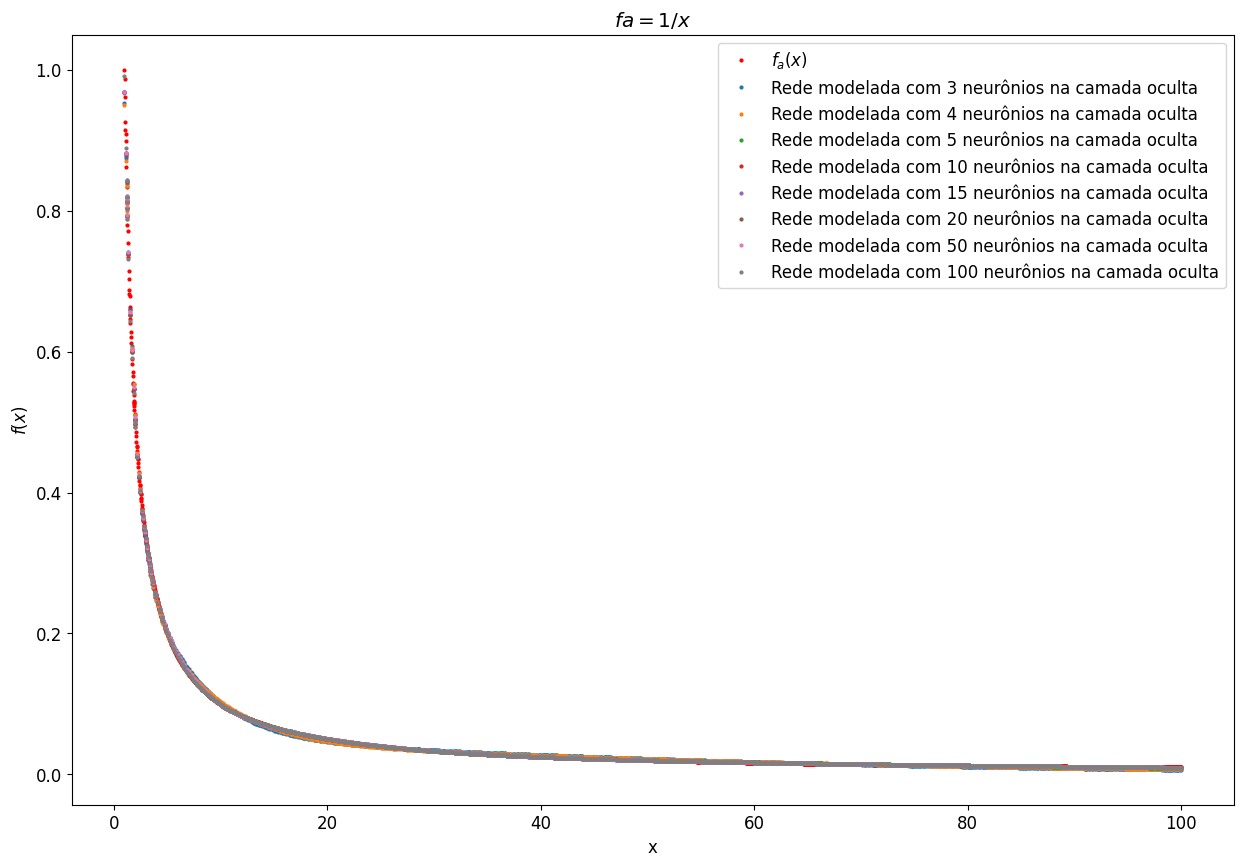

In [ ]:
marker_size = 2

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 10))
plt.plot(fa_data_train[:, 0], fa_data_train[:, 1], 'ro', markersize=marker_size, label = r"$f_a(x)$")
plt.plot(xtestefa, yteste3fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 3 neurônios na camada oculta")
plt.plot(xtestefa, yteste4fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 4 neurônios na camada oculta")
plt.plot(xtestefa, yteste5fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 5 neurônios na camada oculta")
plt.plot(xtestefa, yteste10fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 10 neurônios na camada oculta")
plt.plot(xtestefa, yteste15fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 15 neurônios na camada oculta")
plt.plot(xtestefa, yteste20fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 20 neurônios na camada oculta")
plt.plot(xtestefa, yteste50fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 50 neurônios na camada oculta")
plt.plot(xtestefa, yteste100fa[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 100 neurônios na camada oculta")


plt.title(r"$fa = 1/x$")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

plt.legend()

## $fb$ 

In [ ]:
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 10, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp() # Rescale to desired range
xtestefb = (xmax - xmin) * x + xmin

In [ ]:
yteste3fb = Inferencia(xtestefb, Wcamadaoculta3fb, Wcamadasaida3fb, 3)
yteste4fb = Inferencia(xtestefb, Wcamadaoculta4fb, Wcamadasaida4fb, 4)
yteste5fb = Inferencia(xtestefb, Wcamadaoculta5fb, Wcamadasaida5fb, 5)
yteste10fb = Inferencia(xtestefb, Wcamadaoculta10fb, Wcamadasaida10fb, 10)
yteste15fb = Inferencia(xtestefb, Wcamadaoculta15fb, Wcamadasaida15fb, 15)
yteste20fb = Inferencia(xtestefb, Wcamadaoculta20fb, Wcamadasaida20fb, 20)
yteste50fb = Inferencia(xtestefb, Wcamadaoculta50fb, Wcamadasaida50fb, 50)
yteste100fb = Inferencia(xtestefb, Wcamadaoculta100fb, Wcamadasaida100fb, 100)

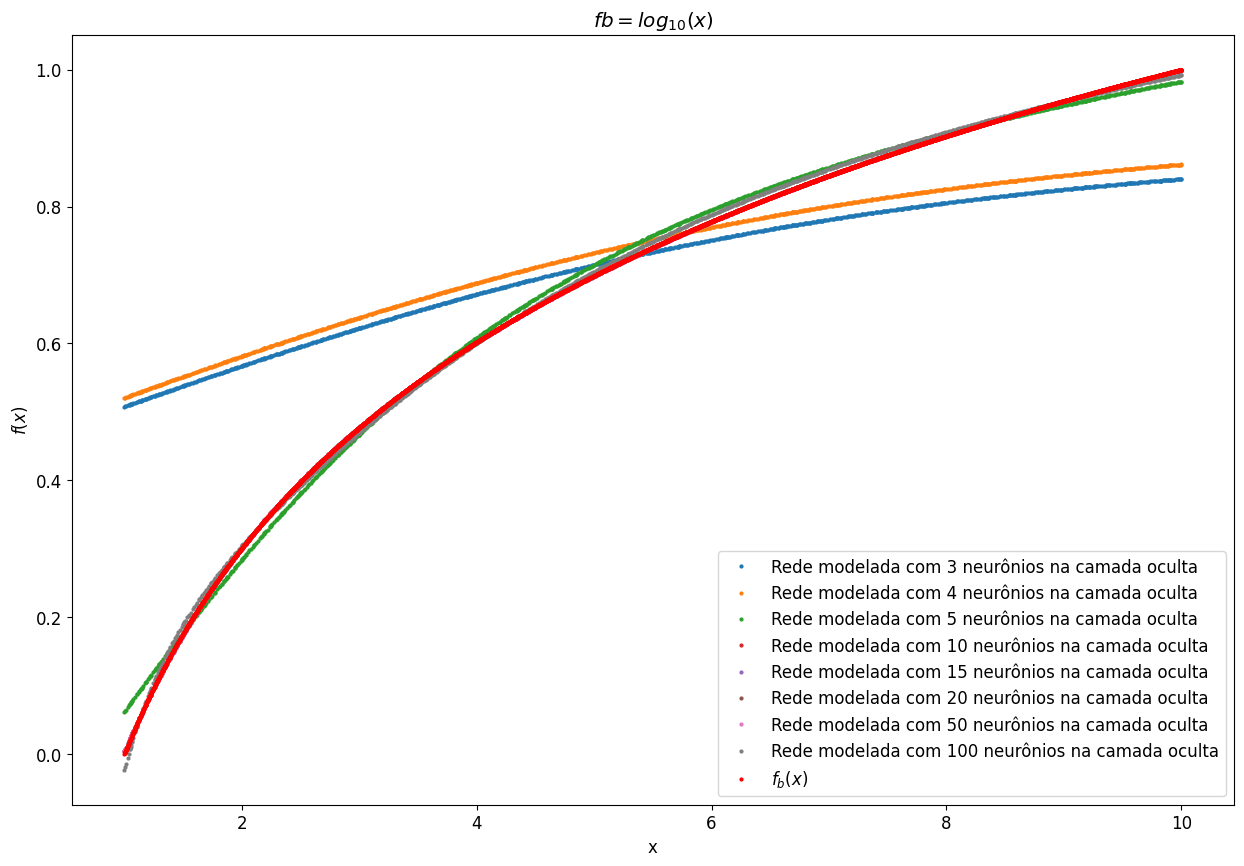

In [ ]:
marker_size = 2

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 10))
plt.plot(xtestefb, yteste3fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 3 neurônios na camada oculta")
plt.plot(xtestefb, yteste4fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 4 neurônios na camada oculta")
plt.plot(xtestefb, yteste5fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 5 neurônios na camada oculta")
plt.plot(xtestefb, yteste10fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 10 neurônios na camada oculta")
plt.plot(xtestefb, yteste15fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 15 neurônios na camada oculta")
plt.plot(xtestefb, yteste20fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 20 neurônios na camada oculta")
plt.plot(xtestefb, yteste50fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 50 neurônios na camada oculta")
plt.plot(xtestefb, yteste100fb[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 100 neurônios na camada oculta")
plt.plot(fb_data_train[:, 0], fb_data_train[:, 1], 'ro', markersize=marker_size, label = r"$f_b(x)$")


plt.title(r"$fb = log_{10}(x)$")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

plt.legend()

## $fc$ 

In [ ]:
# Obtendo xteste (randomizando para obter novos valores na hora de testar)
xmin, xmax, qtd = 1, 10, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp() # Rescale to desired range
xtestefc = (xmax - xmin) * x + xmin

In [ ]:
yteste3fc = Inferencia(xtestefc, Wcamadaoculta3fc, Wcamadasaida3fc, 3)
yteste4fc = Inferencia(xtestefc, Wcamadaoculta4fc, Wcamadasaida4fc, 4)
yteste5fc = Inferencia(xtestefc, Wcamadaoculta5fc, Wcamadasaida5fc, 5)
yteste10fc = Inferencia(xtestefc, Wcamadaoculta10fc, Wcamadasaida10fc, 10)
yteste15fc = Inferencia(xtestefc, Wcamadaoculta15fc, Wcamadasaida15fc, 15)
yteste20fc = Inferencia(xtestefc, Wcamadaoculta20fc, Wcamadasaida20fc, 20)
yteste50fc = Inferencia(xtestefc, Wcamadaoculta50fc, Wcamadasaida50fc, 50)
yteste100fc = Inferencia(xtestefc, Wcamadaoculta100fc, Wcamadasaida100fc, 100)

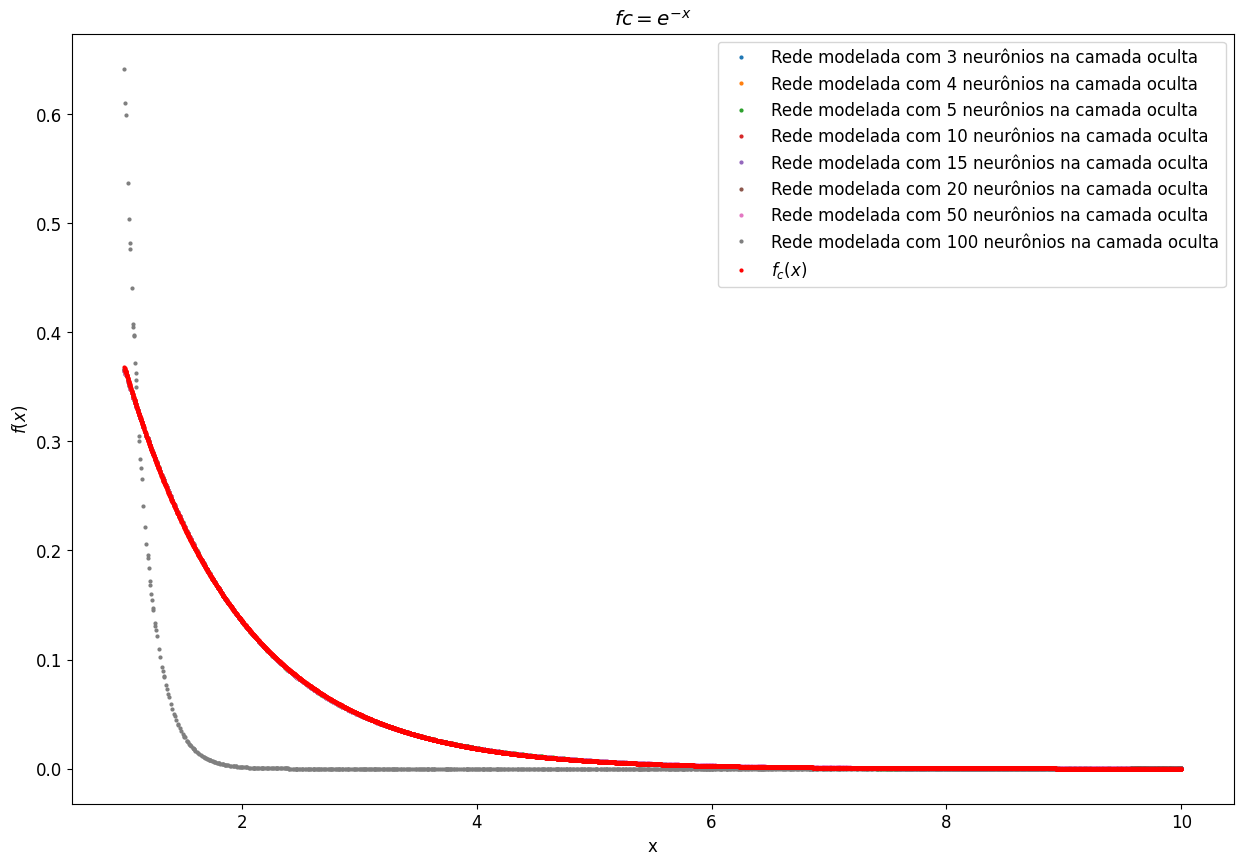

In [ ]:
marker_size = 2

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 10))

plt.plot(xtestefc, yteste3fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 3 neurônios na camada oculta")
plt.plot(xtestefc, yteste4fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 4 neurônios na camada oculta")
plt.plot(xtestefc, yteste5fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 5 neurônios na camada oculta")
plt.plot(xtestefc, yteste10fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 10 neurônios na camada oculta")
plt.plot(xtestefc, yteste15fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 15 neurônios na camada oculta")
plt.plot(xtestefc, yteste20fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 20 neurônios na camada oculta")
plt.plot(xtestefc, yteste50fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 50 neurônios na camada oculta")
plt.plot(xtestefc, yteste100fc[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 100 neurônios na camada oculta")
plt.plot(fc_data_train[:, 0], fc_data_train[:, 1], 'ro', markersize=marker_size, label = r"$f_c(x)$")


plt.title(r"$fc = e^{-x}$")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

plt.legend()

## $fd$

In [ ]:
# Obtendo xteste 
xmin, xmax, qtd = 1, np.pi/2, 1000
x = np.random.random(qtd).cumsum()
x = (x - x.min()) / x.ptp()
xtestefd = (xmax - xmin) * x + xmin

In [ ]:
yteste3fd = Inferencia(xtestefd, Wcamadaoculta3fd, Wcamadasaida3fd, 3)
yteste4fd = Inferencia(xtestefd, Wcamadaoculta4fd, Wcamadasaida4fd, 4)
yteste5fd = Inferencia(xtestefd, Wcamadaoculta5fd, Wcamadasaida5fd, 5)
yteste10fd = Inferencia(xtestefd, Wcamadaoculta10fd, Wcamadasaida10fd, 10)
yteste15fd = Inferencia(xtestefd, Wcamadaoculta15fd, Wcamadasaida15fd, 15)
yteste20fd = Inferencia(xtestefd, Wcamadaoculta20fd, Wcamadasaida20fd, 20)
yteste50fd = Inferencia(xtestefd, Wcamadaoculta50fd, Wcamadasaida50fd, 50)
yteste100fd = Inferencia(xtestefd, Wcamadaoculta100fd, Wcamadasaida100fd, 100)

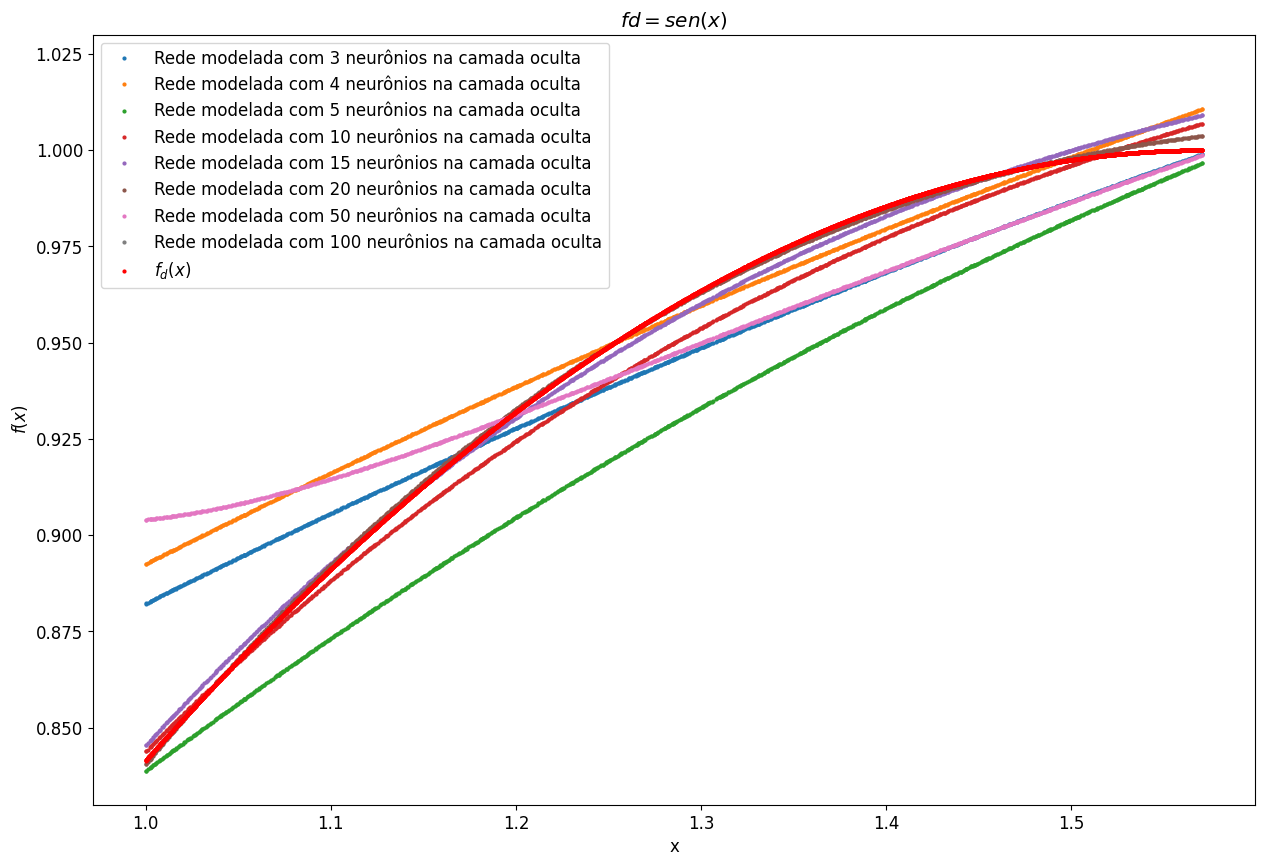

In [ ]:
marker_size = 2

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 10))
plt.ylim(0.830, 1.030)
plt.plot(xtestefd, yteste3fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 3 neurônios na camada oculta")
plt.plot(xtestefd, yteste4fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 4 neurônios na camada oculta")
plt.plot(xtestefd, yteste5fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 5 neurônios na camada oculta")
plt.plot(xtestefd, yteste10fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 10 neurônios na camada oculta")
plt.plot(xtestefd, yteste15fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 15 neurônios na camada oculta")
plt.plot(xtestefd, yteste20fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 20 neurônios na camada oculta")
plt.plot(xtestefd, yteste50fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 50 neurônios na camada oculta")
plt.plot(xtestefd, yteste100fd[0:1000, 0], 'o', markersize=marker_size, label = "Rede modelada com 100 neurônios na camada oculta")
plt.plot(fd_data_train[:, 0], fd_data_train[:, 1], 'ro', markersize=marker_size, label = r"$f_d(x)$")


plt.title(r"$fd = sen(x)$")
plt.ylabel(r'$f(x)$')
plt.xlabel("x")

plt.legend()

# Resultados dos erros quadráticos

In [ ]:
#CRIACAO DE UMA MATRIZ MSE de A
MSEfa = []
##Calculo e print do erro
ya_real = fa(xtestefa)
erroTeste3fa = np.array([ya_real]).T - yteste3fa[0:1000]
erroTeste4fa = np.array([ya_real]).T - yteste4fa[0:1000]
erroTeste5fa = np.array([ya_real]).T - yteste5fa[0:1000]
erroTeste10fa = np.array([ya_real]).T - yteste10fa[0:1000]
erroTeste15fa = np.array([ya_real]).T - yteste15fa[0:1000]
erroTeste20fa = np.array([ya_real]).T - yteste20fa[0:1000]
erroTeste50fa = np.array([ya_real]).T - yteste50fa[0:1000]
erroTeste100fa = np.array([ya_real]).T - yteste100fa[0:1000]


######################################################################################
####################################################################################
MSEfa.append(np.sum(((erroTeste3fa)**2) / len(erroTeste3fa)))    # Calculo do MSEfa para 3 neuronios
MSEfa.append(np.sum(((erroTeste4fa)**2) / len(erroTeste4fa)))    # Calculo do MSEfa para 4 neuronios
MSEfa.append(np.sum(((erroTeste5fa)**2) / len(erroTeste5fa)))    # Calculo do MSEfa para 5 neuronios
MSEfa.append(np.sum(((erroTeste10fa)**2) / len(erroTeste10fa)))  # Calculo do MSEfa para 10 neuronios
MSEfa.append(np.sum(((erroTeste15fa)**2) / len(erroTeste15fa)))  # Calculo do MSEfa para 15 neuronios
MSEfa.append(np.sum(((erroTeste20fa)**2) / len(erroTeste20fa)))  # Calculo do MSEfa para 20 neuronios
MSEfa.append(np.sum(((erroTeste50fa)**2) / len(erroTeste50fa)))  # Calculo do MSEfa para 50 neuronios
MSEfa.append(np.sum(((erroTeste100fa)**2) / len(erroTeste100fa))) # Calculo do MSEfa para 100 neuronios

######################################################################################
##PRINT DOS MSE DE A

print_neuronio = [3, 4, 5, 10, 15, 20, 50, 100]

print(f"|{'Neurônios':^12}|{'MSEfa':^10}|")
print("+------------+----------+")

for i in range(len(MSEfa)):
    print(f"|{print_neuronio[i]:^12}|{MSEfa[i]:^10.8f}|")

print("+------------+----------+")

######################################################################################

| Neurônios  |  MSEfa   |
+------------+----------+
|     3      |0.00001052|
|     4      |0.00000710|
|     5      |0.00000192|
|     10     |0.00000182|
|     15     |0.00000206|
|     20     |0.00000197|
|     50     |0.00000236|
|    100     |0.00000023|
+------------+----------+


In [ ]:
##Calculo e print do erro
MSEfb = []
yb_real = fb(xtestefb)
erroTeste3fb = np.array([yb_real]).T - yteste3fb[0:1000]
erroTeste4fb = np.array([yb_real]).T - yteste4fb[0:1000]
erroTeste5fb = np.array([yb_real]).T - yteste5fb[0:1000]
erroTeste10fb = np.array([yb_real]).T - yteste10fb[0:1000]
erroTeste15fb = np.array([yb_real]).T - yteste15fb[0:1000]
erroTeste20fb = np.array([yb_real]).T - yteste20fb[0:1000]
erroTeste50fb = np.array([yb_real]).T - yteste50fb[0:1000]
erroTeste100fb = np.array([yb_real]).T - yteste100fb[0:1000]

MSEfb.append(np.sum(((erroTeste3fb)**2) / len(erroTeste3fb)))
MSEfb.append(np.sum(((erroTeste4fb)**2) / len(erroTeste4fb)))
MSEfb.append(np.sum(((erroTeste5fb)**2) / len(erroTeste5fb)))
MSEfb.append(np.sum(((erroTeste10fb)**2) / len(erroTeste10fb)))
MSEfb.append(np.sum(((erroTeste15fb)**2) / len(erroTeste15fb)))
MSEfb.append(np.sum(((erroTeste20fb)**2) / len(erroTeste20fb)))
MSEfb.append(np.sum(((erroTeste50fb)**2) / len(erroTeste50fb)))
MSEfb.append(np.sum(((erroTeste100fb)**2) / len(erroTeste100fb)))
##PRINT DOS MSE DE A

print_neuronio = [3, 4, 5, 10, 15, 20, 50, 100]

print(f"|{'Neurônios':^12}|{'MSEfb':^10}|")
print("+------------+----------+")

for i in range(len(MSEfb)):
    print(f"|{print_neuronio[i]:^12}|{MSEfb[i]:^10.8f}|")

print("+------------+----------+")

######################################################################################

| Neurônios  |  MSEfb   |
+------------+----------+
|     3      |0.02773787|
|     4      |0.02866816|
|     5      |0.00020532|
|     10     |0.00000026|
|     15     |0.00000068|
|     20     |0.00000046|
|     50     |0.00000039|
|    100     |0.00004955|
+------------+----------+


In [ ]:
##Calculo e print do erro
MSEfc = []
yc_real = fc(xtestefc)
erroTeste3fc = np.array([yc_real]).T  - yteste3fc[0:1000]
erroTeste4fc = np.array([yc_real]).T  - yteste4fc[0:1000]
erroTeste5fc = np.array([yc_real]).T  - yteste5fc[0:1000]
erroTeste10fc = np.array([yc_real]).T  - yteste10fc[0:1000]
erroTeste15fc = np.array([yc_real]).T  - yteste15fc[0:1000]
erroTeste20fc = np.array([yc_real]).T  - yteste20fc[0:1000]
erroTeste50fc = np.array([yc_real]).T  - yteste50fc[0:1000]
erroTeste100fc = np.array([yc_real]).T  - yteste100fc[0:1000]

MSEfc.append(np.sum(((erroTeste3fc)**2) / len(erroTeste3fc)))
MSEfc.append(np.sum(((erroTeste4fc)**2) / len(erroTeste4fc)))
MSEfc.append(np.sum(((erroTeste5fc)**2) / len(erroTeste5fc)))
MSEfc.append(np.sum(((erroTeste10fc)**2) / len(erroTeste10fc)))
MSEfc.append(np.sum(((erroTeste15fc)**2) / len(erroTeste15fc)))
MSEfc.append(np.sum(((erroTeste20fc)**2) / len(erroTeste20fc)))
MSEfc.append(np.sum(((erroTeste50fc)**2) / len(erroTeste50fc)))
MSEfc.append( np.sum(((erroTeste100fc)**2) / len(erroTeste100fc)))

print(f"|{'Neurônios':^12}|{'MSEfc':^10}|")
print("+------------+----------+")

for i in range(len(MSEfc)):
    print(f"|{print_neuronio[i]:^12}|{MSEfc[i]:^10.8f}|")

print("+------------+----------+")

######################################################################################

| Neurônios  |  MSEfc   |
+------------+----------+
|     3      |0.00000007|
|     4      |0.00000013|
|     5      |0.00000038|
|     10     |0.00000017|
|     15     |0.00000022|
|     20     |0.00000014|
|     50     |0.00000028|
|    100     |0.00398636|
+------------+----------+


In [ ]:
######################################################################################
##Calculo e print do erro
MSEfd = []
yd_real = fd(xtestefd)
erroTeste3fd = np.array([yd_real]).T - yteste3fd[0:1000]
erroTeste4fd = np.array([yd_real]).T - yteste4fd[0:1000]
erroTeste5fd = np.array([yd_real]).T - yteste5fd[0:1000]
erroTeste10fd = np.array([yd_real]).T - yteste10fd[0:1000]
erroTeste15fd = np.array([yd_real]).T - yteste15fd[0:1000]
erroTeste20fd = np.array([yd_real]).T - yteste20fd[0:1000]
erroTeste50fd = np.array([yd_real]).T - yteste50fd[0:1000]
erroTeste100fd = np.array([yd_real]).T - yteste100fd[0:1000]

MSEfd.append(np.sum(((erroTeste3fd)**2) / len(erroTeste3fd)))
MSEfd.append(np.sum(((erroTeste4fd)**2) / len(erroTeste4fd)))
MSEfd.append(np.sum(((erroTeste5fd)**2) / len(erroTeste5fd)))
MSEfd.append(np.sum(((erroTeste10fd)**2) / len(erroTeste10fd)))
MSEfd.append(np.sum(((erroTeste15fd)**2) / len(erroTeste15fd)))
MSEfd.append(np.sum(((erroTeste20fd)**2) / len(erroTeste20fd)))
MSEfd.append(np.sum(((erroTeste50fd)**2) / len(erroTeste50fd)))
MSEfd.append(np.sum(((erroTeste100fd)**2) / len(erroTeste100fd)))

######################################################################################
print(f"|{'Neurônios':^12}|{'MSEfd':^10}|")
print("+------------+----------+")

for i in range(len(MSEfd)):
    print(f"|{print_neuronio[i]:^12}|{MSEfd[i]:^10.8f}|")

print("+------------+----------+")

######################################################################################

| Neurônios  |  MSEfd   |
+------------+----------+
|     3      |0.00025612|
|     4      |0.00029958|
|     5      |0.00052455|
|     10     |0.00004281|
|     15     |0.00000932|
|     20     |0.00000110|
|     50     |0.00044067|
|    100     |0.90110269|
+------------+----------+
